In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [37]:
column_names = [
    'fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',
    'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class'
]
data = pd.read_csv('./magic+gamma+telescope/magic04.data', header=None, names=column_names)

data.head()
data.info()

data['class'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


class
g    12332
h     6688
Name: count, dtype: int64

In [38]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64


In [39]:
# Converts 'g' and 'h' to 0 and 1
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])

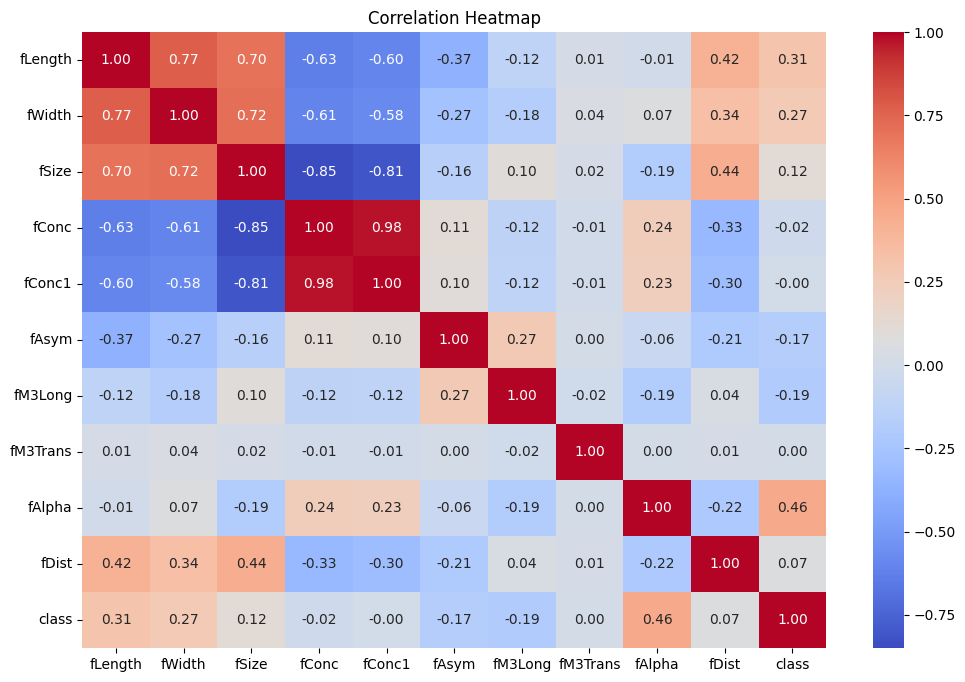

In [40]:

plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [41]:

X = data.drop('class', axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22051662, stratify=y)

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Confusion Matrix:
[[3342  358]
 [ 825 1181]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      3700
           1       0.77      0.59      0.67      2006

    accuracy                           0.79      5706
   macro avg       0.78      0.75      0.76      5706
weighted avg       0.79      0.79      0.79      5706


Accuracy Score:
Accuracy: 0.79
